In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'../scrap/listing_details.csv', dtype=object)

In [2]:
df

,Type,Quartier,Price,Area,Rooms,Bedrooms,Bathrooms,Status
0,Appartement,Hay Houda,546000,63,3,2,2,Nouveau
1,Appartement,Hay Houda,979000,89,4,3,2,Nouveau
2,Appartement,Hay Houda,1012000,92,4,3,2,Nouveau
3,Appartement,Hay Houda,966000,84,4,3,2,Nouveau
4,Appartement,Hay Houda,957000,87,4,3,2,Nouveau
...,...,...,...,...,...,...,...,...
786,Appartement,Hay Mohammadi,630000,64,3,2,2,Nouveau
787,Villa,Hay Dakhla,2600000,222,6,4,2,Bon état
788,Maison,Zone Industrielle Agadir,1800000,120,3,2,2,Bon état
789,Appartement,Hay Houda,1150000,123,3,2,2,Nouveau


In [3]:
print(df.isnull().sum())

Type           0
Quartier       0
Price        123
Area           0
Rooms         29
Bedrooms       2
Bathrooms      4
Status        29
dtype: int64


In [4]:
#delete rows with missing price values
df = df.dropna(subset=['Price'])

In [5]:
print(df.isnull().sum())

Type          0
Quartier      0
Price         0
Area          0
Rooms        28
Bedrooms      2
Bathrooms     4
Status       28
dtype: int64


In [6]:
# Convert numerical columns to appropriate data types
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')

C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2786761158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2786761158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2786761158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [11]:
# Fill missing bedrooms values
df['Bedrooms'] = df['Bedrooms'].fillna(
    df.groupby(['Type', 'Quartier', 'Area'])['Bedrooms']
    .transform(lambda x: x.mean()))

# Fill missing bedrooms Bathrooms
df['Bathrooms'] = df['Bathrooms'].fillna(
    df.groupby(['Type', 'Quartier'])['Bathrooms']
    .transform(lambda x: x.mean()))


C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2923739001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bedrooms'] = df['Bedrooms'].fillna(
C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2923739001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathrooms'] = df['Bathrooms'].fillna(


In [12]:
print(df.isnull().sum())

Type          0
Quartier      0
Price         0
Area          0
Rooms        28
Bedrooms      0
Bathrooms     0
Status       28
dtype: int64


In [33]:
# Fill missing Rooms values
df['Rooms'] = df['Rooms'].fillna(
    df.groupby(['Type', 'Quartier', 'Status'])['Rooms']
    .transform(lambda x: x.mean()))

C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\2899983665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].fillna(


In [27]:
# Fill missing Status values , status is a categorical variable

def fill_Status(row):
        if pd.isnull(row['Status']):
            mode_value = df[(df['Type'] == row['Type']) &
                            (df['Quartier'] == row['Quartier'])]['Status'].mode()
            if not mode_value.empty:
                return mode_value[0]
            else:
                mode_value = df[df['Quartier'] == row['Quartier']]['Status'].mode()
                return mode_value[0]
        else:
            return row['Status']

df['Status'] = df.apply(fill_Status, axis=1)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\392156433.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df.apply(fill_Status, axis=1)


In [ ]:
#delete rows with missing rooms values

In [34]:
print(df.isnull().sum())

Type         0
Quartier     0
Price        0
Area         0
Rooms        0
Bedrooms     0
Bathrooms    0
Status       0
dtype: int64


# Dimention redution

In [36]:
df.Quartier = df.Quartier.apply(lambda x: x.strip())

Quartiers = df.groupby('Quartier')['Quartier'].agg('count').sort_values(ascending=False)
Quartiers

C:\Users\Hassan\AppData\Local\Temp\ipykernel_19420\124348820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quartier = df.Quartier.apply(lambda x: x.strip())


Quartier
Hay Mohammadi               131
Hay Salam                    65
Hay Houda                    52
Founti                       39
Haut Founty                  35
Tilila                       33
Secteur Touristique          32
Hay Dakhla                   29
Abattoirs                    22
Riad Salam                   19
Cité Adrar                   18
Ben Serguaou                 15
Al Wifaq                     14
Hay Najah                    13
Charaf                       12
Hay Massira                  11
Ville Nouvelle               11
Extension Dakhla             10
Taddart                       9
Talborjt                      8
Haut Anza                     8
Zone Industrielle Agadir      8
Amicales                      8
Anza                          7
Taddart Anza                  7
Tikiouine                     6
Illigh                        6
Lekhiam                       5
Port                          5
Bouargane                     4
Siusse                        4

In [43]:
Quartiers[Quartiers < 5]

Quartier
Bouargane         4
Siusse            4
Amsernate         4
Anahda            3
Hay Al Farah      3
Agadir Oufella    2
Hay Qods          2
Boutchakat        2
Hay Zaytoun       2
Hay Al Wafaa      2
Assaka            1
Ihchach           1
Name: Quartier, dtype: int64

In [40]:
# delete rows with Quartier values that have less than 4 occurrences
df = df[~df.Quartier.isin(Quartiers[Quartiers < 5].index)]

In [46]:
# Save df to csv file for further analysis and preprocessing
df.to_csv('Data_clean.csv', index=False)

# Outlier Removal

In [1]:
import pandas as pd
import plotly.express as px
# Load the dataset
data = pd.read_csv(r'Data_clean.csv', dtype=object)

In [3]:
# Distribution of listings by type using plotly
px.histogram(data, x='Type', title='Distribution of listings by type').show()


In [11]:
# replace Maison with Villa
data['Type'] = data['Type'].replace('Maison', 'Villa')

In [12]:
px.histogram(data, x='Type', title='Distribution of listings by type').show()

In [13]:
px.histogram(data, x='Price', nbins=50, title='Distribution of Property Prices').show()

In [14]:
px.scatter(data, x='Area', y='Price', color='Type', title='Price vs. Area').show()

In [15]:
px.scatter(data, x='Quartier', y='Price', color='Type', title='Price vs. Area').show()

In [22]:
# add price per square meter column
#change price to numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data['Price_per_sqm'] = data['Price'] / data['Area']

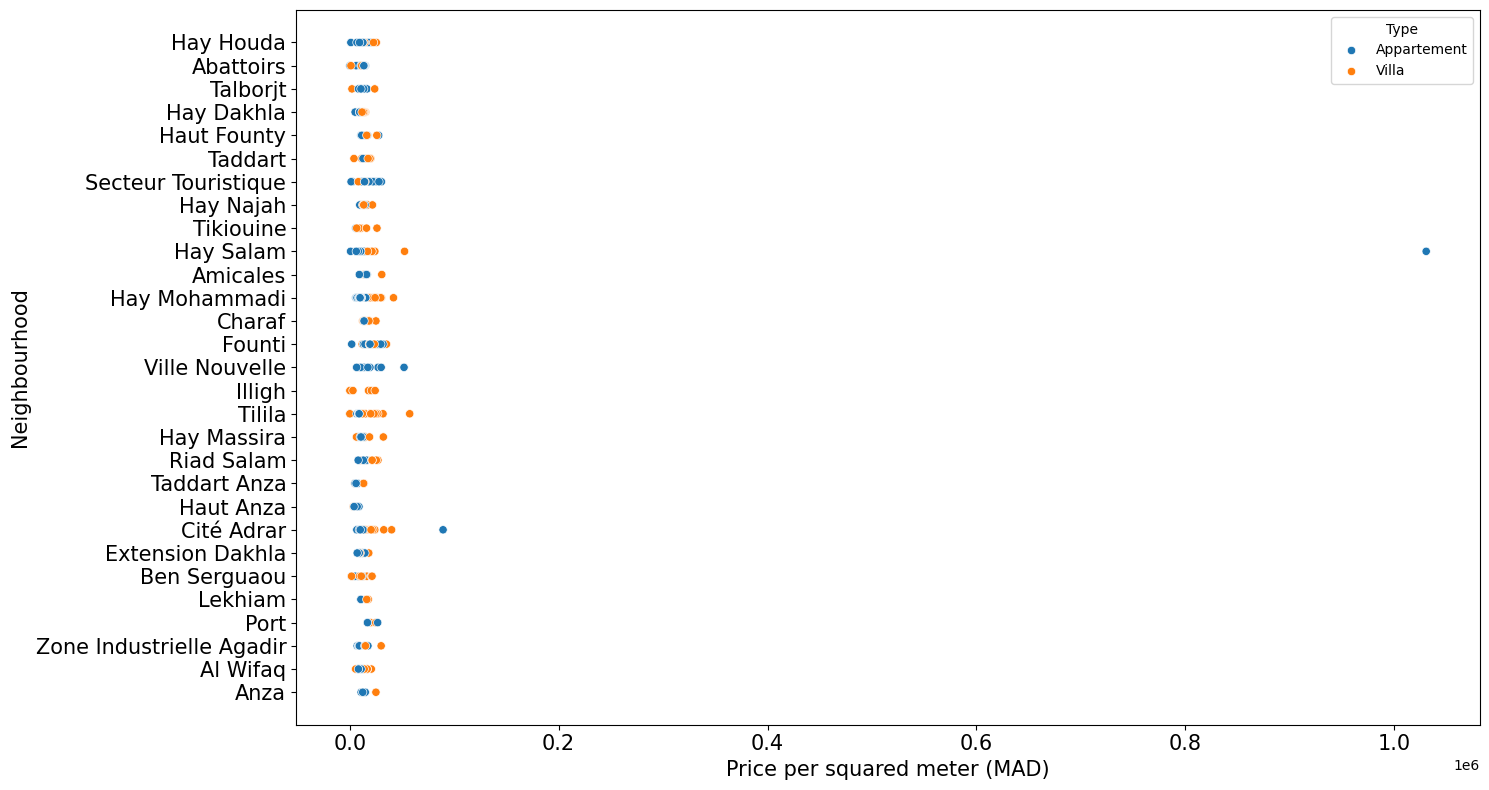

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = data,y='Quartier',x='Price_per_sqm',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [25]:
# delete the row with the highest price per square meter
data = data[data['Price_per_sqm'] != data['Price_per_sqm'].max()]

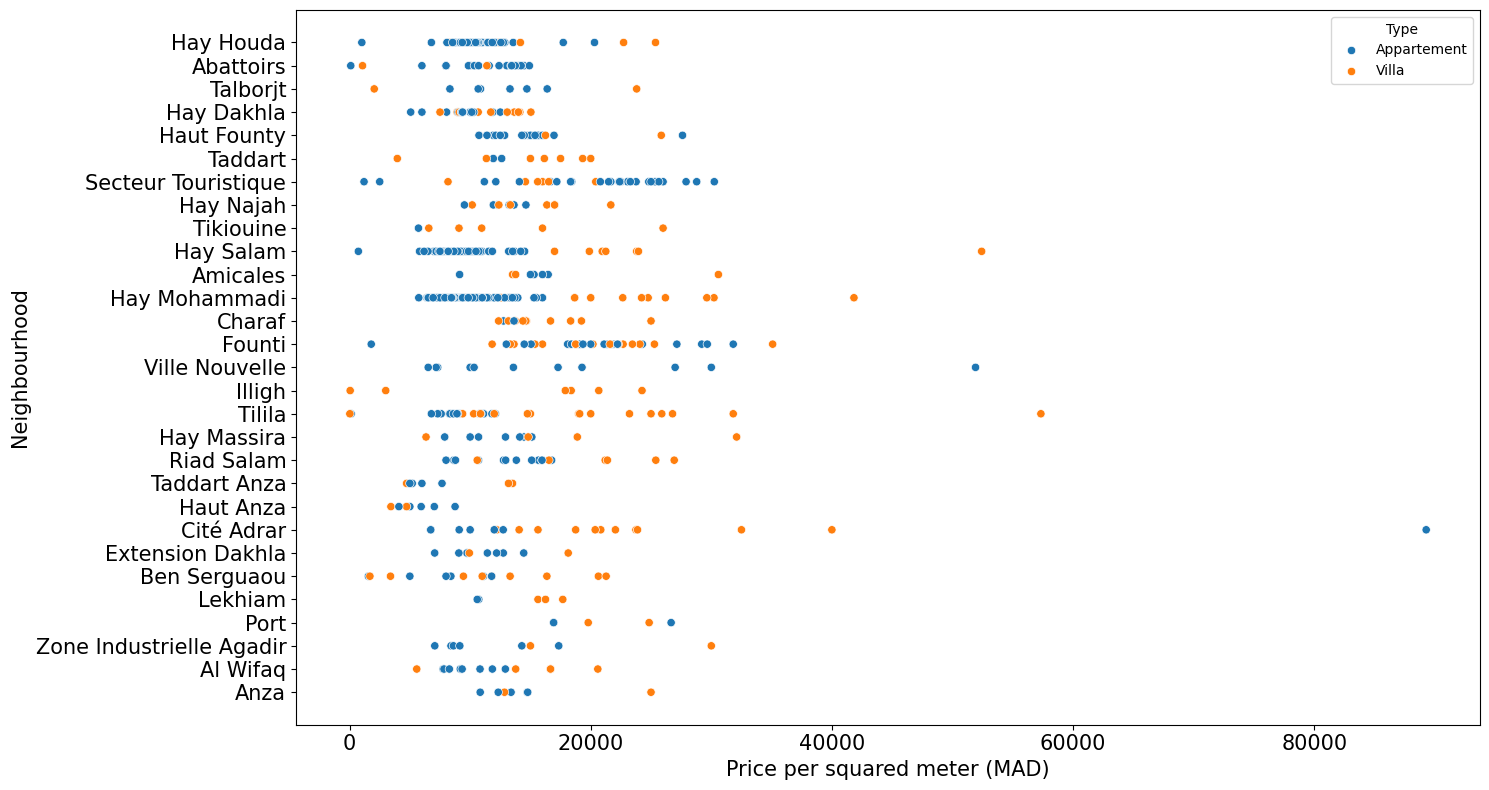

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = data,y='Quartier',x='Price_per_sqm',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [28]:
# delete the row with the highest price per square meter
data = data[data['Price_per_sqm'] != data['Price_per_sqm'].max()]

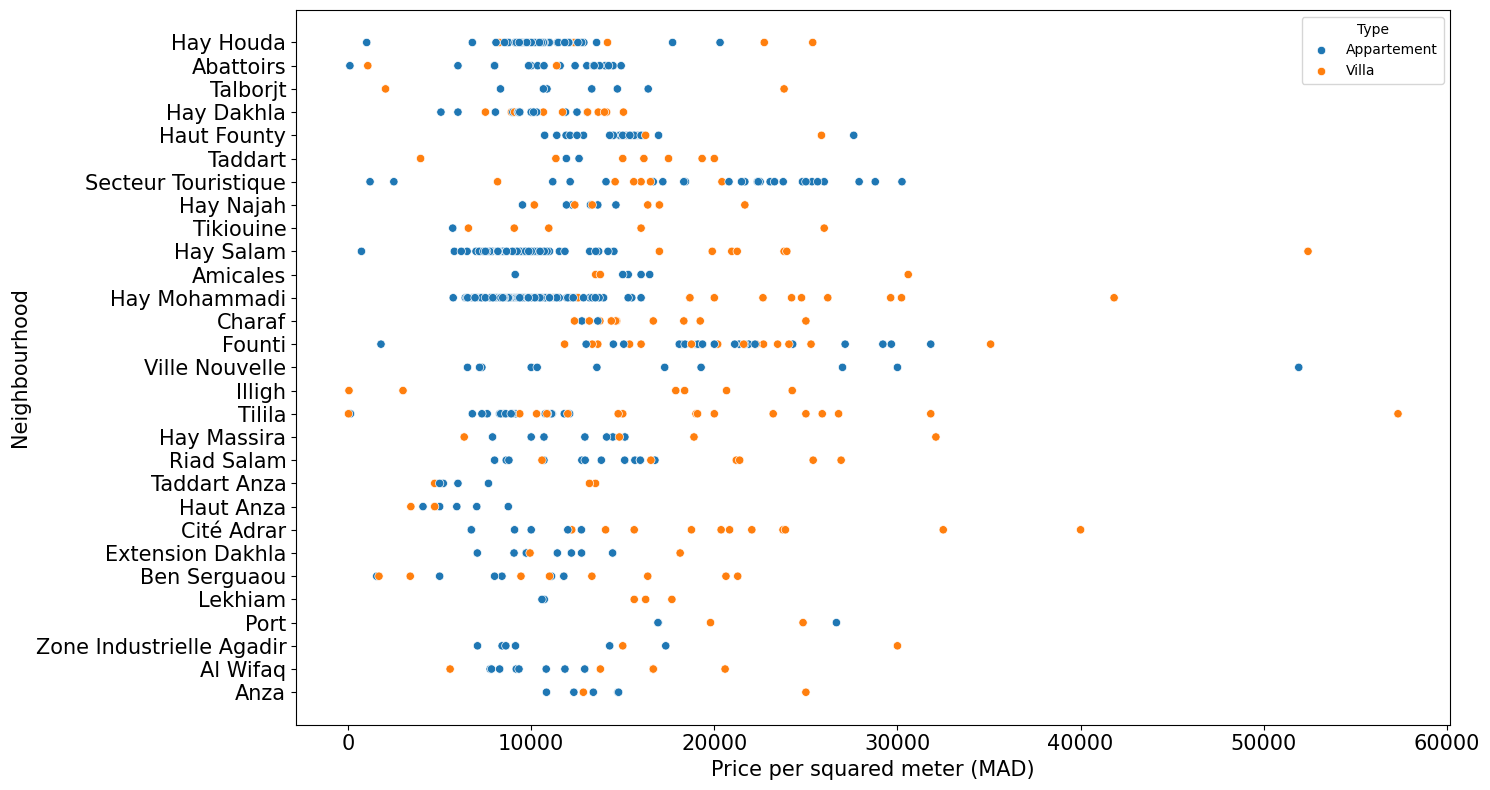

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = data,y='Quartier',x='Price_per_sqm',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [33]:
# delete the 3 rows with the highest price per square meter
data = data[data['Price_per_sqm'] != data['Price_per_sqm'].max()]


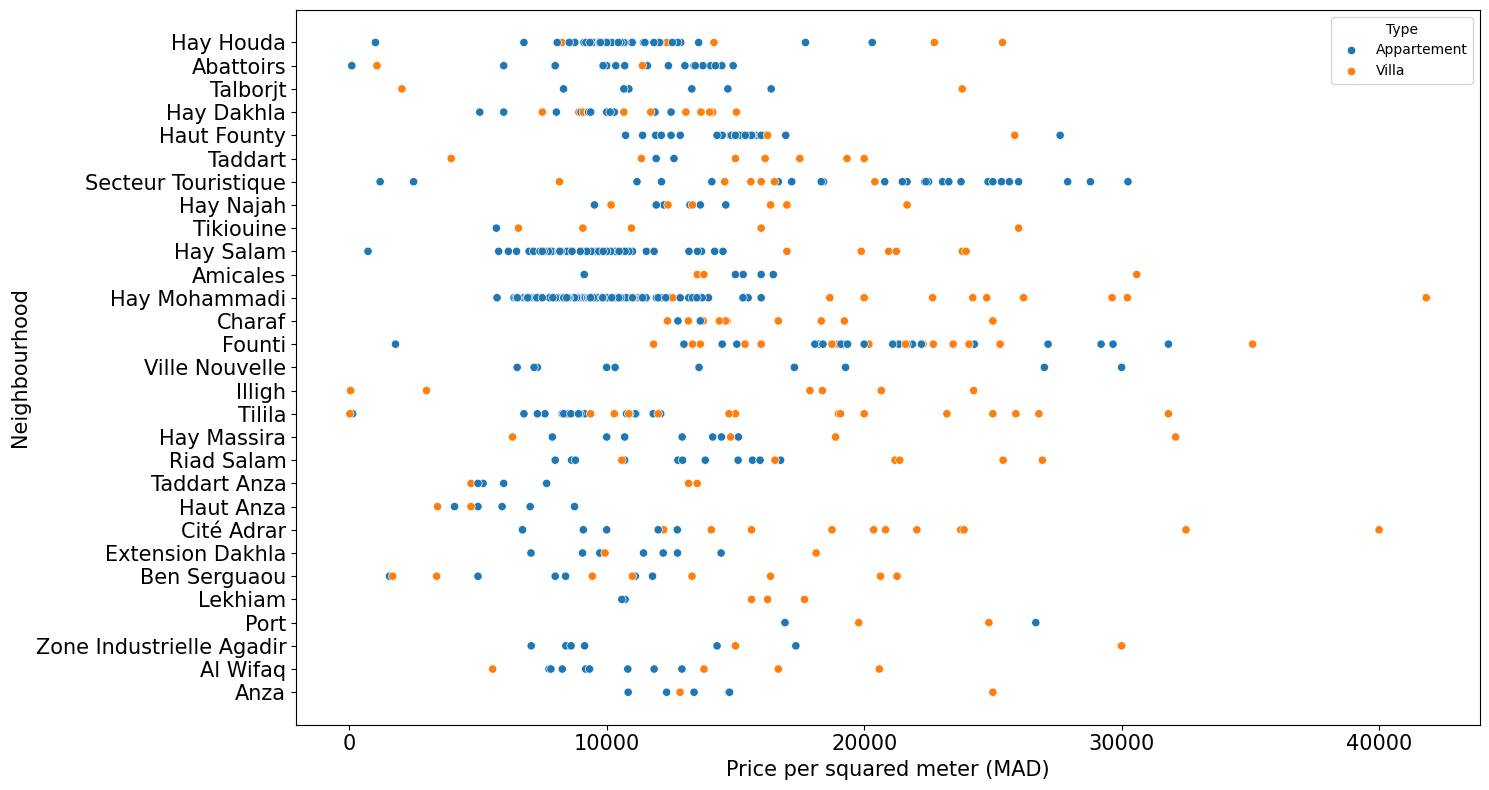

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = data,y='Quartier',x='Price_per_sqm',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In [35]:
# delete the row with the highest price per square meter
data = data[data['Price_per_sqm'] != data['Price_per_sqm'].max()]

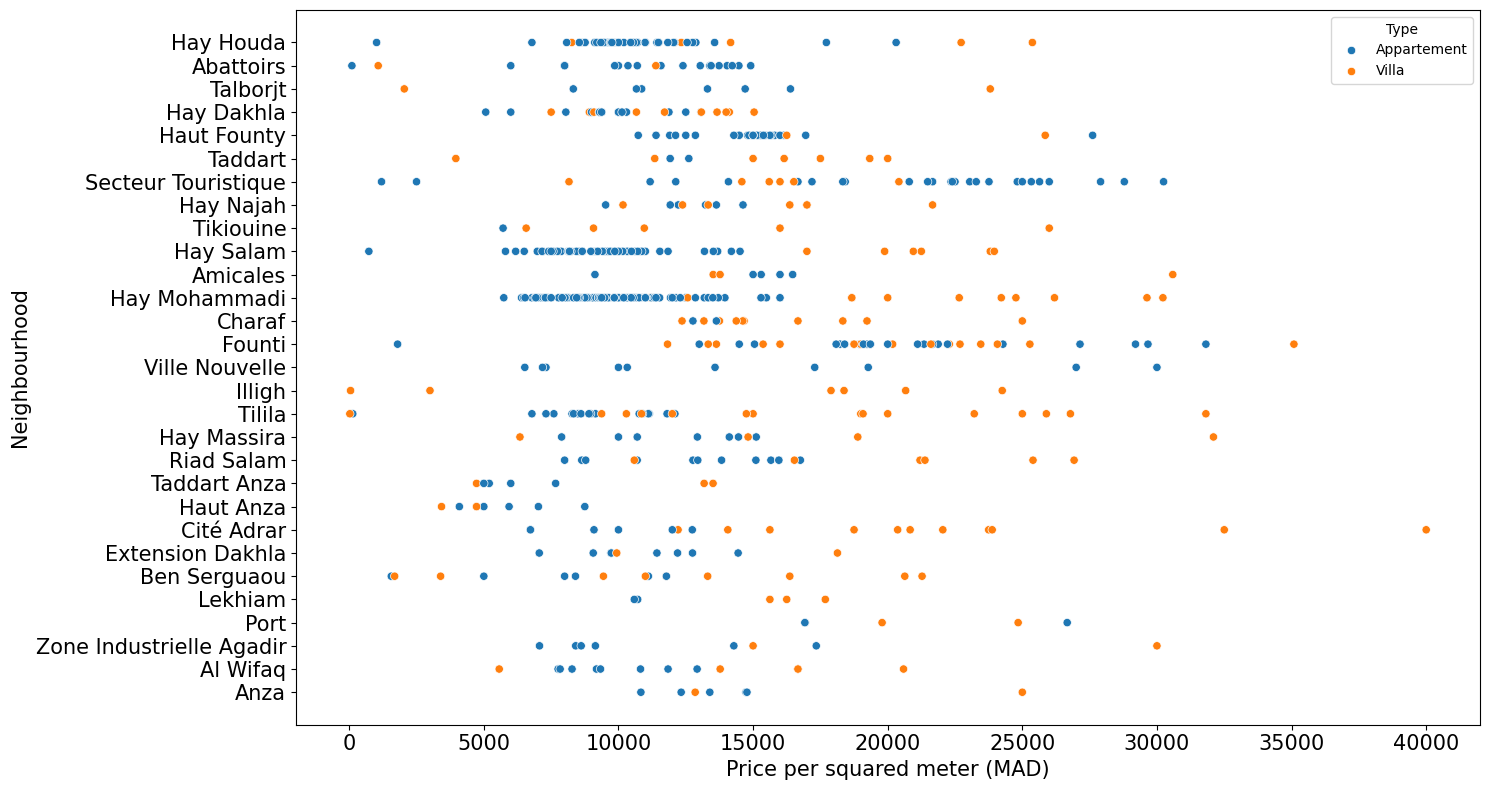

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = data,y='Quartier',x='Price_per_sqm',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price per squared meter (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

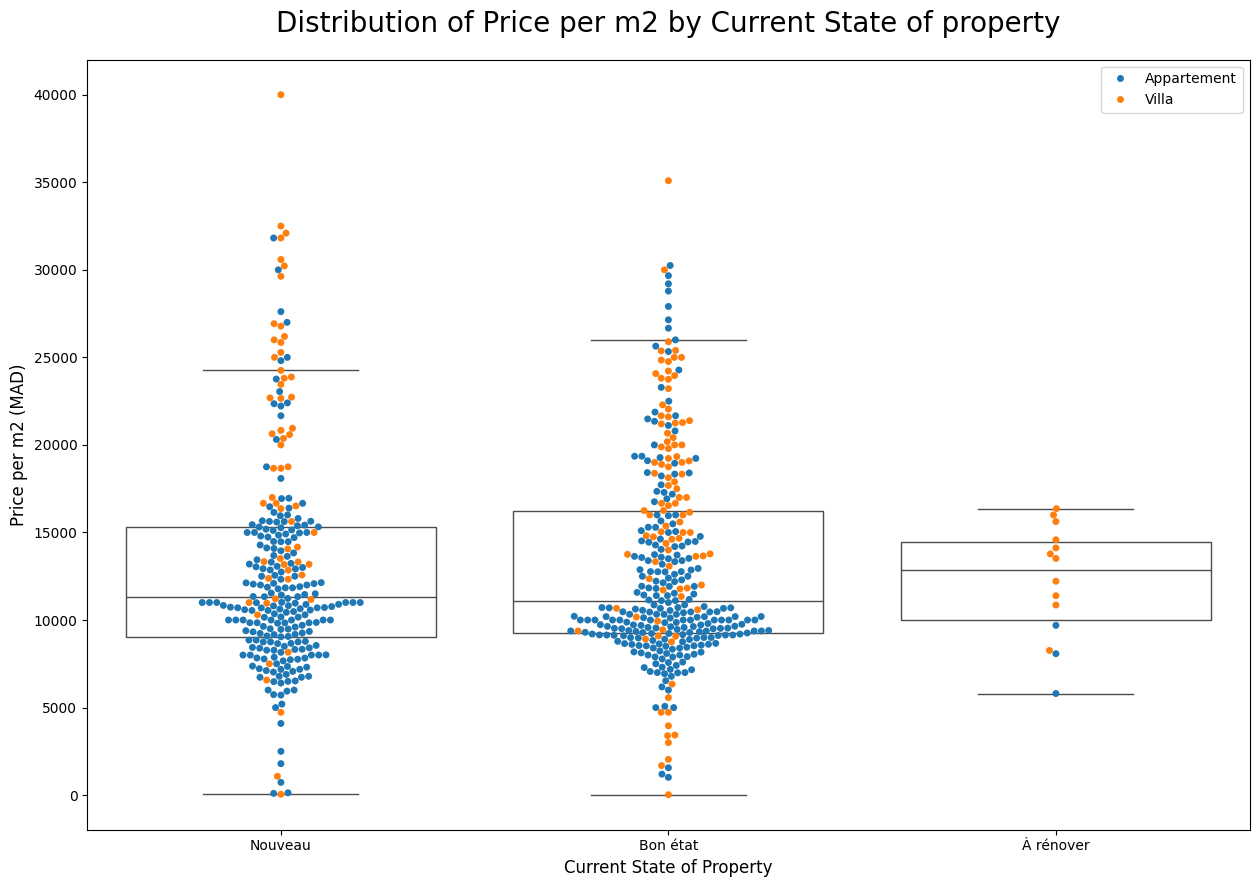

In [39]:
#Average price per m2 by tag
fig, ax = plt.subplots(figsize = (15,10))

# Define the cust_pal variable

#Plot swarm and box for average price by current state variable
g = sns.swarmplot(data= data,
                x = 'Status',
                y = 'Price_per_sqm',
                ax = ax,
                hue = 'Type',
                order = ['Nouveau','Bon état','À rénover'])
g = sns.boxplot(data= data,
                  x = 'Status',
                  y = 'Price_per_sqm',
                  ax = ax,
                  order = ['Nouveau','Bon état','À rénover'],
                  showcaps=True,
                  boxprops={'facecolor':'None'},
                  showfliers=False,
                  whiskerprops={'linewidth':0})
ax.set_title('Distribution of Price per m2 by Current State of property',fontsize = 20,pad = 20)
ax.set_xlabel('Current State of Property',fontsize = 12)
ax.set_ylabel('Price per m2 (MAD)',fontsize = 12)

plt.show()

In [40]:
# remove collum of price per square meter
data = data.drop('Price_per_sqm', axis=1)

In [41]:
data.to_csv('data_eda.csv',index=False)